# FAIR Workflows evaluation

Thank you for agreeing to participate in the user evaluation of our FAIR Workflows approach. Below we give you first a quick introduction of how to deal with such FAIR Workflows in Python, and then we will give you two short tasks.

## Using the fairworkflows library
The `fairworkflows` library is intended to provide a simple way to make your 'normal' python code FAIR, automatically generating a prospective provenance description of the workflow (prior to execution) and a retrospective provenance description during execution. All these semantic descriptions are in the form of RDF triples, which can be published as a series of nanopublications.

## How do I use it?
The library introduces two decorators: `is_fairstep` and `is_fairworkflow`. `is_fairstep` is used to mark functions that are 'steps' in your processing, and `is_fairworkflow` is used to mark functions which combine these steps into the overall 'workflow'.

This should hopefully become clearer with an example:

### 1. Import the decorators

Make sure to run this line now, as otherwise you'll get errors later on during the tasks:

In [2]:
from fairworkflows import is_fairworkflow, is_fairstep, FairStep, FairWorkflow

### 2. Define your steps
Each 'step' should be in a function. The arguments to the function should ideally have type hinting. You must mark the function using the is_fairstep decorator, and provide a 'label' - a string that gives a more verbose title to the step.

In [3]:
@is_fairstep(label='Add two numbers together')
def add(a:float, b:float) -> float:
    return a + b

In [4]:
@is_fairstep(label='Subtract two numbers')
def sub(a: float, b: float) -> float:
    return a - b

In [5]:
@is_fairstep(label='Multiply two numbers together')
def mul(a: float, b: float) -> float:
    return a * b

In [6]:
@is_fairstep(label='A mathematical operation')
def weird(a: float, b:float) -> float:
    return a * 2 + b * 4

### Define your workflow using @fairworkflow
Now write a function which describes your workflow. Mark this function with the @is_fairworkflow decorator.

In [7]:
@is_fairworkflow(label='A simple addition, subtraction, multiplication workflow')
def my_workflow(in1, in2, in3):
    t1 = add(in1, in2)
    t2 = sub(in1, in2)
    t3 = mul(weird(t1, in3), t2)
    return t3

## Create an instance of your workflow and display it
Now that you have marked your steps and workflow, you are ready to create a FAIR workflow from it:

In [8]:
fw = FairWorkflow.from_function(my_workflow)

You can optionally display this workflow object graphically, using its `display()` method:

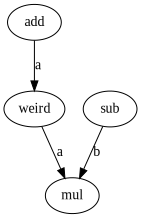

In [9]:
fw.display()

## Execute your workflow using .execute()
You can now execute your workflow. This workflow took three input parameters, so we must provide these are arguments to its `execute()` method.

In [25]:
result, prov = fw.execute(1, 4, 3)
result

-66

### Using FAIRWorkflows Jupyter Lab extension
You should see a tab in the far left sidebar of this window called 'FAIRWorkflows'. Click on this tab and the extension widget should open on the left. It will look something like this:

![image.png](introimg/fairworkflows_widget.png)

You can search for existing steps using text in the search bar. Results will appear below, as you type. Clicking on a result will inject that step's description into the notebook, into a new cell beneath the currently selected one. Ensure that 'raw' is selected as the `Inject` option:

![image.png](introimg/inject.png)

Try typing "rotate" into the Search field. After a brief moment, some search results should appear. Click on one and it will fetch the step from that nanopublication and inject it into this notebook. Please check that you have selected the notebook cell below this one, so that it is injected there.

In [ ]:
# Select this cell before clicking on the search result. The code should then be injected into the cell beneath this one.

If you successfully load a step it will look like this:

In [ ]:
@is_fairstep(label='Rotating an image represented by 90 degrees')
def rotate_image(img):
    from PIL import Image
    return img.transpose(Image.ROTATE_90)


rotate_image._fairstep.derived_from='http://purl.org/np/RAhktiJRIPegCgGhGRI4BgBVMfGRf7_6lOIf4em7sCPpw'


After running the loaded cell, you can use the loaded function (`rotate_image` in this case) as a normal function in your code when you define a workflow.

You have finished the tutorial section and may move on to the short tasks below. If you are having difficulties then please don't hesitate to contact the evaluation organisers.

# Task 1

Create a workflow from exisiting steps that converts an image to a pencil sketch. This is an example input and output:

**Input:** ![input image 1](img/puppy.png) **Output:** ![input image 2](example/puppy-output.png)

This workflow can be implemented with the following steps:

1. Convert the RGB color image to grayscale.
2. Invert the grayscale image to get a negative.
3. Apply a Gaussian blur to the negative from step 2.
4. Blend the grayscale image from step 1 with the blurred negative from step 3.
5. Adjust the constrast of the final image

Load the needed steps below and then define your workflow function:

In [2]:
# TASK: Load the steps here

In [ ]:
# TASK: define your workflow function here

To test your workflow, run it on the following example:

**Input:** ![input image 1](img/mountains.png) **Output:** ?

In [10]:
from PIL import Image
inputImg1 = Image.open("img/mountains.png")

In [ ]:
# TASK: run here your workflow with the image above as input

If you get error messages or the result doesn't match the expectations, try to improve your code to resolve them.

# Task 2

As a second task, you should create a new workflow using only steps that already exist. This workflow is about image processing. Concrete the workflow to be created should take two input images, and produce a combined output image in the way illustrated by these two examples:

**Input:** ![input image 1](img/gras.png) ![input image 2](img/parrot.png) **Output:** ![input image 1](example/output1.png)

**Input:** ![input image 1](img/city.png) ![input image 2](img/dog.png) **Output:** ![input image 1](example/output3.png)

To start, you can here load the steps you think you are going to need by using the FAIRWorkflows sidebar (as explained above). You can type a search keyword like "image" to search for steps that have that word in their label.

In [2]:
# TASK: Load the steps here

Next, you can define here your workflow function based on the steps you loaded above:

In [ ]:
# TASK: define your workflow function here

To test your workflow, you can run them on these two input images:

**Input:** ![input image 1](img/mountains.png) ![input image 2](img/rose.png) **Output:** ?

This is how you can load them in Python:

In [10]:
from PIL import Image

inputImg1 = Image.open("img/mountains.png")
inputImg2 = Image.open("img/rose.png")

And now you can try out your workflow to see whether it returns the desired output (you can use the `show()` method on an Image object to see it as an image):

In [ ]:
# TASK: run here your workflow with the images above as input

If you get error messages or the result doesn't match the expectations, try to improve your code to resolve them.

# Task 3

In this last task, we want you to get some experience with the publishing and reusing capabilities of the framework. For this, we ask you to create your own step in the form of a toy example of an "awesome" step, and then combine it with other such "awesome" steps that others have published.

Define a step that takes an input image and manipulates the image and returns the altered image.
You might want to consult the [Pillow library documentation](https://pillow.readthedocs.io/en/stable/reference/Image.html) for that.
You can get inspiration from the steps you have loaded above.

In [3]:
# TASK : Define your step function
@is_fairstep(label='Put here a name of your awesome step (include the word awesome so others will find it)')
# Give it your own name:
def my_awesome_step(image):    
    from PIL import Image
    # new_image = ....
    return new_image

Now you can publish this step to the network, so others can load and use it:

In [ ]:
# Make sure to adapt the function name to what you define above:
my_awesome_step._fairstep.publish_as_nanopub()

Use the sidebar to find and load at least one other "awesome" step published by somebody else:

In [3]:
# TASK: Load the step here
# TASK: Change the step function name

Now create a new "awesome" toy workflow using the step you defined above and the step you imported from somebody else:

In [ ]:
# TASK: Define a workflow using two awesome steps
@is_fairworkflow(label='My awesome workflow')
def my_awesome_workflow(im_in):
    ## ...
    return im_out

To test your workflow, run it on the following example:

In [ ]:
inputImg1 = Image.open("img/mountains.png")

In [ ]:
# TASK: run here your workflow with the image above as input